In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
background = pd.read_csv("anon-data/background.csv")
control = pd.read_csv("anon-data/control.txt", names=["id"])
experimental = pd.read_csv("anon-data/experimental.txt", names=["id"])

In [4]:
control_list = [x[0] for x in control.values.tolist()]
experimental_list = [x[0] for x in experimental.values.tolist()]

In [5]:
background_control = background[background["id"].isin(control_list)].drop('id', axis=1)
background_experimental = background[background["id"].isin(experimental_list)].drop('id', axis=1)

In [16]:
def process_col(colname):
    control_vals = background_control[colname].unique()
    experimental_vals = background_experimental[colname].unique()

    x = []
    for i in control_vals:
        if i not in x:
            x.append(i)
    for i in experimental_vals:
        if i not in x:
            x.append(i)

    value_count_df_control = background_control[colname].value_counts().reset_index()
    value_count_df_control.columns = ["Answer", "counts"]
    answer_count_control = dict(zip(value_count_df_control["Answer"], value_count_df_control["counts"])) 

    value_count_df_experimental = background_experimental[colname].value_counts().reset_index()
    value_count_df_experimental.columns = ["Answer", "counts"]
    answer_count_experimental = dict(zip(value_count_df_experimental["Answer"], value_count_df_experimental["counts"])) 

    for key in answer_count_control:
        if key not in answer_count_experimental:
            answer_count_experimental[key] = 0

    for key in answer_count_experimental:
        if key not in answer_count_control:
            answer_count_control[key] = 0

    y = []
    y2 = []

    for i in x:
        y.append(answer_count_control[i])
        y2.append(answer_count_experimental[i])

    
    return pd.Series(x), y, y2

In [33]:
def plot_question(question, xlabel, title):
    x, y, y2 = process_col(question)
    x_axis = np.arange(len(x))
    width = 0.4
    plt.bar(x_axis, height=y, width=width, label="Control")
    plt.bar(x_axis + width, height=y2, width=width, label="Experimental")

    plt.xticks(x_axis,x)
    plt.xticks(rotation=45)

    min_y = min(y)
    min_y2 = min(y2)
    min_val = min_y if min_y < min_y2 else min_y2

    max_y = max(y)
    max_y2 = max(y2)
    max_val = max_y if max_y > max_y2 else max_y2

    plt.yticks(range(min_val, max_val + 1))

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Number of participants")
    plt.legend()

    plt.show()

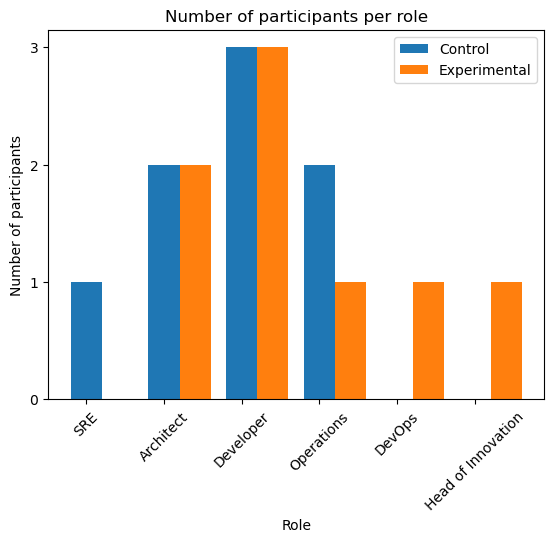

In [34]:
plot_question("What is your current role?", "Role", "Number of participants per role")

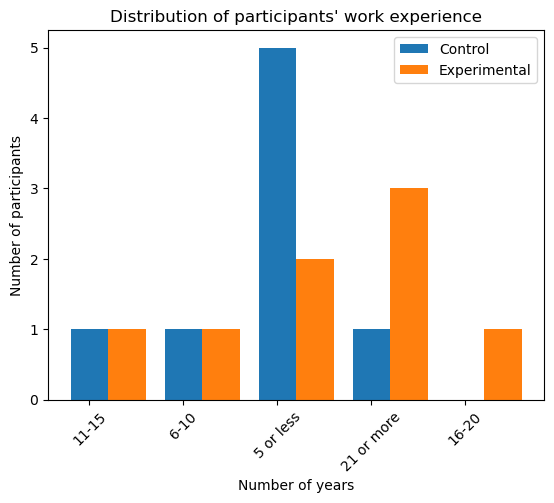

In [37]:
plot_question("Approximately how many years of professional experience do you have in software development and related tasks?", "Number of years", "Distribution of participants' work experience")

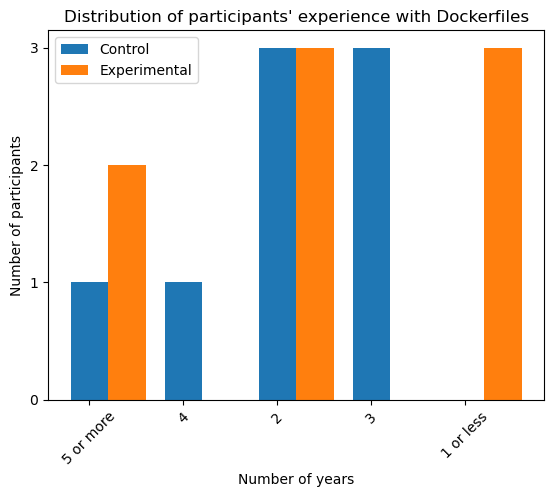

In [38]:
plot_question("Approximately how many years of professional experience do you have developing Dockerfiles?", "Number of years", "Distribution of participants' experience with Dockerfiles")

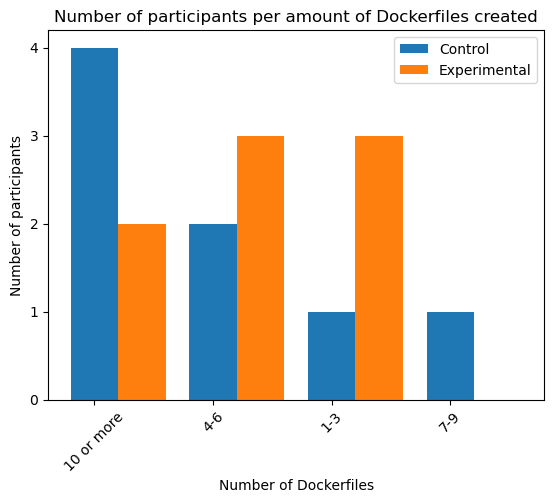

In [39]:
plot_question("Approximately how many Dockerfiles have you written from scratch into a working first version?", "Number of Dockerfiles", "Number of participants per amount of Dockerfiles created")

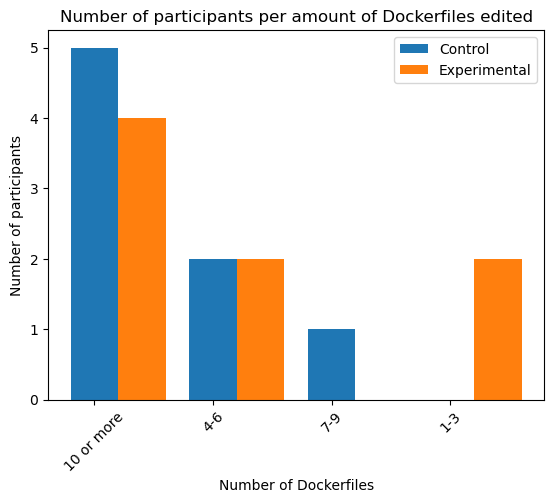

In [40]:
plot_question("Approximately how many Dockerfiles have you edited?", "Number of Dockerfiles", "Number of participants per amount of Dockerfiles edited")